In [1]:
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from deepface import DeepFace

In [2]:
!ls

Untitled.ipynb
WhatsApp Image 2021-03-28 at 1.24.04 AM (1).jpeg
archive.zip
aug
bal..actstmnt.pdf
david.h5
disgust.jpeg
download.jpeg
fear.jpeg
frame1.jpeg
frame2.jpeg
frontalFace10
frontalFace10.zip
haarcascade_frontalface_alt2.xml
haarcascade_frontalface_default.xml
id.png
mask.ipynb
mini project bench mark.ipynb
miniproject.ipynb
sad.jpeg
second_model_weights.h5
soft.pages
surprised.jpeg
temp.jpg
test
train
traning


In [3]:
img_array=cv2.imread("traning/0/PrivateTest_7833671.jpg")

In [4]:
img_array.shape

(48, 48, 3)

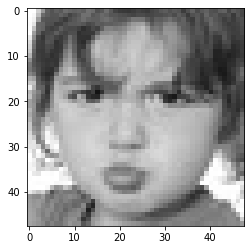

In [5]:
plt.imshow(img_array)

### Reading image from each class

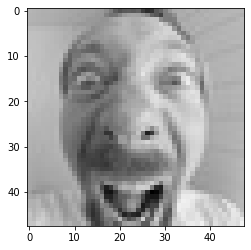

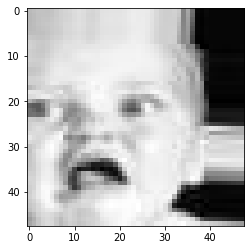

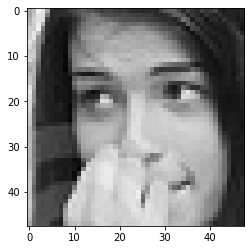

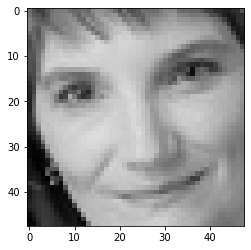

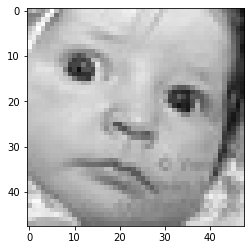

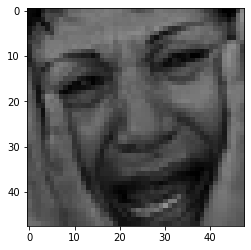

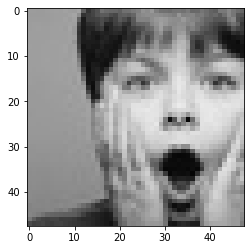

In [6]:
fol="train/"
classes=["0",'1','2','3','4','5','6']
for catagory in classes:
    path=os.path.join(fol,catagory)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break

(48, 48, 3)


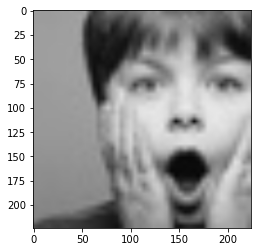

In [7]:
img_size=224
print(img_array.shape)
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()
print()

In [8]:
new_array.shape

(224, 224, 3)

### counting images of each class

{'angry': 3995, 'disgust': 4226, 'fear': 4097, 'happy': 7215, 'neutral': 4965, 'sad': 4830, 'surprise': 3171}


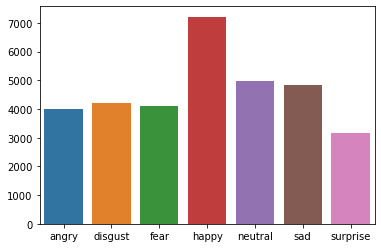

In [9]:
import seaborn as sns
d={}
for i in classes:
    path=os.path.join(fol,i)
    if i=="0":
        d["angry"] =len(os.listdir(path))
    elif i=="1":
        d["disgust"] =len(os.listdir(path))
    elif i=="2":
        d["fear"] =len(os.listdir(path))
    elif i=="3":
        d["happy"] =len(os.listdir(path))
    elif i=="4":
        d["neutral"] =len(os.listdir(path))
    elif i=="5":
        d["sad"] =len(os.listdir(path))
    else:
        d["surprise"] =len(os.listdir(path))
print(d)
keys = list(d.keys())
vals = [float(d[k]) for k in keys]
sns.barplot(x=keys, y=vals)

## Data Augmentation using and keras

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

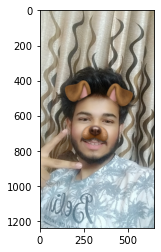

In [11]:
frame=cv2.imread("aug/sourav.jpeg")
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [18]:

datagen = ImageDataGenerator(
        validation_split = 0.2,                         
        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

img = load_img('aug/sourav.jpeg')  
x = img_to_array(img)  
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='aug', save_prefix='sk', save_format='jpeg'):
    i += 1
    if i > 10:
        break


"\nimg = load_img('aug/sourav.jpeg')  \nx = img_to_array(img)  \nx = x.reshape((1,) + x.shape)\ni = 0\nfor batch in datagen.flow(x, batch_size=1,\n                          save_to_dir='aug', save_prefix='sk', save_format='jpeg'):\n    i += 1\n    if i > 10:\n        break\n"

Populating the interactive namespace from numpy and matplotlib


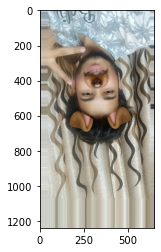

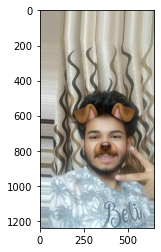

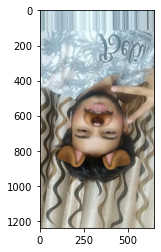

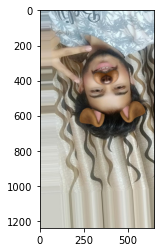

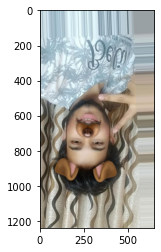

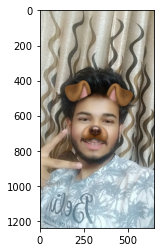

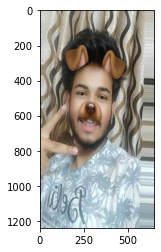

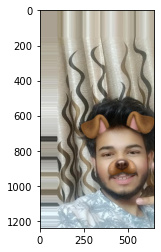

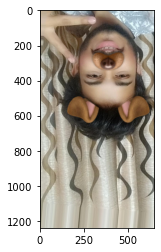

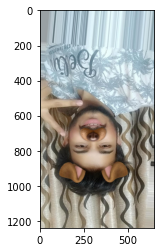

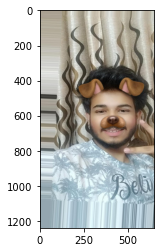

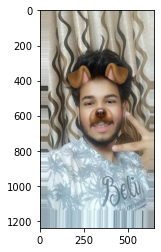

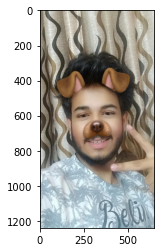

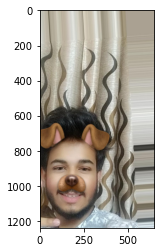

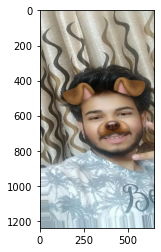

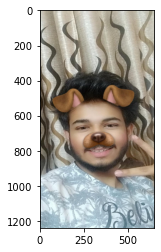

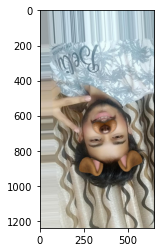

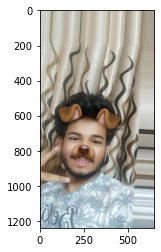

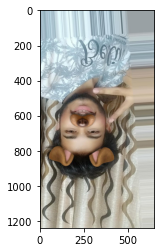

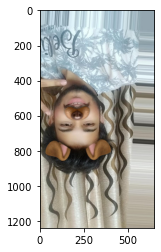

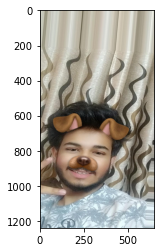

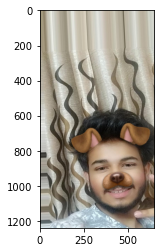

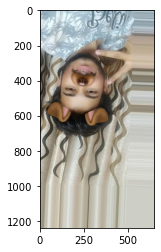

In [19]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as img

path="aug"
for im in os.listdir(path):
    try:
        im=os.path.join(path,im)
        photo=img.imread(im)
        plt.imshow(photo)
        plt.show()
    except:
        continue

In [22]:
'''
path="train/1/"
for im in os.listdir(path):
    try:
        
        im=os.path.join(path,im)
        photo=img.imread(im) 
        x = img_to_array(photo)  
        x = x.reshape((1,) + x.shape)
        i = 0
        for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='train/1', save_prefix='regenrated', save_format='jpg'):
            i += 1
            if i > 10:
                break
    except:
        continue
'''


{'angry': 3995, 'disgust': 4226, 'fear': 4097, 'happy': 7215, 'neutral': 4965, 'sad': 4830, 'surprise': 3171}


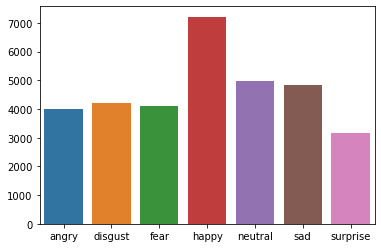

In [9]:
import seaborn as sns
d={}
for i in classes:
    path=os.path.join(fol,i)
    if i=="0":
        d["angry"] =len(os.listdir(path))
    elif i=="1":
        d["disgust"] =len(os.listdir(path))
    elif i=="2":
        d["fear"] =len(os.listdir(path))
    elif i=="3":
        d["happy"] =len(os.listdir(path))
    elif i=="4":
        d["neutral"] =len(os.listdir(path))
    elif i=="5":
        d["sad"] =len(os.listdir(path))
    else:
        d["surprise"] =len(os.listdir(path))
print(d)
keys = list(d.keys())
vals = [float(d[k]) for k in keys]
sns.barplot(x=keys, y=vals)

### Resizing all images from (48,48,3) to (224,224,3)

In [10]:
traning_Data=[]

def create_traning_Data():
    for category in classes:
        path=os.path.join(fol, category)
        class_num=classes.index(category)
        for img in os.listdir(path):
            try:
                img_array =cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                traning_Data.append([new_array,class_num])
            except Exception as e:
                pass
create_traning_Data()

In [11]:
#traning_Data

In [12]:
import random

random.shuffle(traning_Data)

In [13]:
np.array(traning_Data).shape

(32499, 2)

In [14]:
X=[]
y=[]
img_size=224
for features,label in traning_Data:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1,img_size,img_size,3)

In [15]:
#X

### normalizing - bring pixels in range from [0,255] to [0,1]

In [16]:
X=X/255.0

In [17]:
y=np.array(y)

In [18]:
X.shape

(32499, 224, 224, 3)

# deep learning model for traning -Transfer learning

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layersn

In [20]:
model=keras.applications.MobileNetV2()

In [21]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

# Transfer Learning - Tuning , weights will start from last check Point

In [22]:
base_input=model.layers[0].input
base_input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [23]:
base_output=model.layers[-1].output
base_output

<KerasTensor: shape=(None, 1000) dtype=float32 (created by layer 'predictions')>

In [24]:
final_output= layers.Dense(128)(base_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(64)(final_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(7,activation='softmax')(final_output)

In [25]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [26]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [27]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [28]:
new_model.compile(loss="sparse_categorical_crossentropy",
                 optimizer="adam",
                 metrics=['accuracy'])

In [29]:
#y[7000]

In [30]:
new_model=tf.keras.models.load_model("second_model_weights.h5")

In [31]:
#new_model.fit(X,y,epochs=1)

In [32]:
#new_model.save("second_model_weights.h5")

In [33]:
#new_model=tf.keras.models.load_model("second_model_weights.h5")

# Haar Cascade

In [34]:
frame=cv2.imread("download.jpeg")

In [35]:
frame.shape

(183, 276, 3)

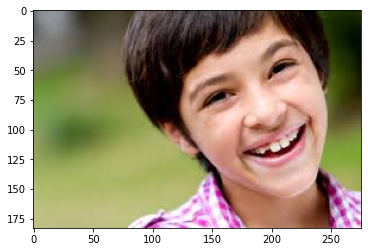

In [36]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [37]:
!pwd

/Users/sourav/Desktop/miniproject 2


In [39]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades 
                   + 'haarcascade_frontalface_alt2.xml')


In [40]:
print( face_cascade.empty() )

False


In [41]:
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [42]:
gray.shape

(183, 276)

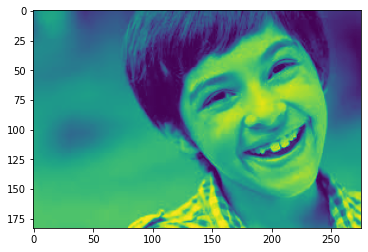

In [43]:
plt.imshow(gray)

In [44]:
faces=face_cascade.detectMultiScale(gray,1.1,4)
print(faces)

[[120  13 132 132]]


In [45]:
for(x,y,w,h)in faces:
    cv2.rectangle(gray,(x,y),(x+w,y+h),(0,255,0),2)
    
    

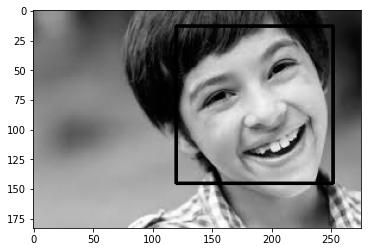

In [46]:
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

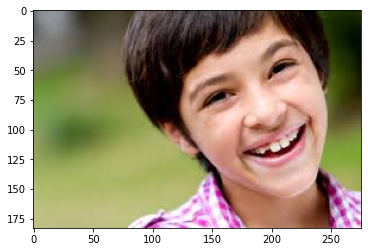

In [47]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

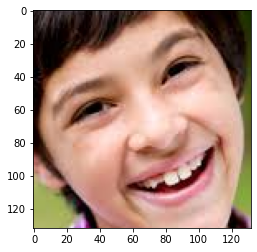

In [48]:
roi=frame[y:y+h,x:x+w]
plt.imshow(cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

In [49]:
final_image=cv2.resize(roi,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/225
final_image.shape

(1, 224, 224, 3)

In [50]:
prediction=new_model.predict(final_image)

In [51]:
prediction[0]

array([0.04325257, 0.00639791, 0.04351648, 0.79550105, 0.04003146,
       0.04351982, 0.02778076], dtype=float32)

In [52]:
np.argmax(prediction)

3

In [53]:
text={0:"Angry",1:"Disgust",2:"FEAR",3:"HAPPY",4:"SAD",5:"SURPRISED",6:"NUtral"}

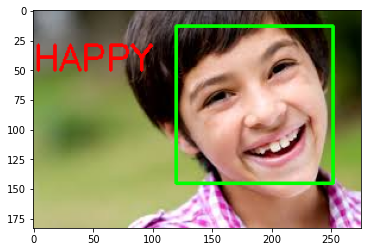

In [54]:
text={0:"Angry",1:"Disgust",2:"FEAR",3:"HAPPY",4:"SAD",5:"SURPRISED",6:"NUtral"}
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
font= cv2.FONT_HERSHEY_SIMPLEX
def putting_text(frame):
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.1,4)
    
    for(x,y,w,h)in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    roi=frame[y:y+h,x:x+w]
    final_image=cv2.resize(roi,(224,224))
    final_image=np.expand_dims(final_image,axis=0)
    final_image=final_image/225
    prediction=new_model.predict(final_image)
    arg=np.argmax(prediction)
    cv2.putText(frame,text[arg],(0,50),font,1,(0,0,255),2,cv2.LINE_4)
    return frame
plt.imshow(cv2.cvtColor(putting_text(frame), cv2.COLOR_BGR2RGB))

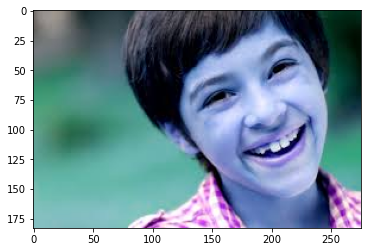

In [55]:
img=cv2.imread("download.jpeg")
plt.imshow(img)

Action: race: 100%|██████████| 4/4 [00:07<00:00,  1.81s/it]   


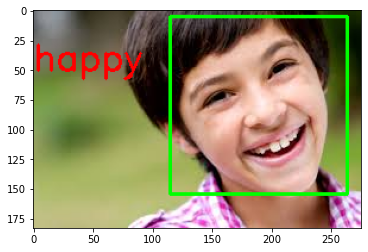

In [56]:
predictions=DeepFace.analyze(img)
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

faces=faceCascade.detectMultiScale(gray,1.1,4)

for(x,y,w,h)in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
font= cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img,predictions['dominant_emotion'],(0,50),font,1,(0,0,255),2,cv2.LINE_4)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

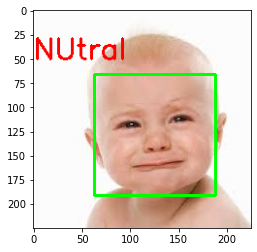

In [58]:
frame=cv2.imread("sad.jpeg")
plt.imshow(cv2.cvtColor(putting_text(frame), cv2.COLOR_BGR2RGB))

# real time implementation

In [ ]:
import cv2

path='haarcascade_frontalface_alt2.xml'
font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN

rectangle_bgr=(255,255,255)
img=np.zeros((500,500))

text="Some text in box!"

(text_width,text_height)=cv2.getTextSize(text,font,fontScale=font_scale,thickness=1)[0]

text_offset_x=10
text_offset_y=img.shape[0]-25

box_coords=((text_offset_x,text_offset_y),(text_offset_x+text_width+2,text_offset_y-text_height-2))

cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr,cv2.FILLED)
cv2.putText(img,text,(text_offset_x,text_offset_y),font,fontScale=font_scale,thickness=1,color=(0,0,0))

cap=cv2.VideoCapture(1)
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IDEError("cannnot open webcam!")
import cv2


cv2.namedWindow("Window")
while(True):
    ret,frame=cap.read()
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray=gray[y:y+h,x:x+w]
    
        roi_color=frame[y:y+h,x:x+w]
    
        frame=cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    final_image=cv2.resize(roi_color,(224,224))
    final_image=np.expand_dims(final_image,axis=0)
    final_image=final_image/225
    
    prediction=new_model.predict(final_image)

    font_scale=1.5
    font=cv2.FONT_HERSHEY_PLAIN

    if(np.argmax(prediction)==0):
        status="Angry"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,225),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,225),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,225))
    elif(np.argmax(prediction)==1):
        status="Disgust"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,225),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,225),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,225))
    elif(np.argmax(prediction)==2):
        status="FEAR"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,225),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,225),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,225))
    elif(np.argmax(prediction)==3):
        status="HAPPY"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,225),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,225),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,225))
    elif(np.argmax(prediction)==4):
        status="SAD"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,225),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,225),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,225))
    elif(np.argmax(prediction)==5):
        status="SURPRISED"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,225),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,225),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,225))
    else:
        status="NUtral"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,225.0),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,225),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,225))
    cv2.imshow("Window", frame)

    #This breaks on 'q' key
    
video_capture.release()
cv2.destroyAllWindows()   

sk
sk
sk
sk
sk
sk
sk
sk
sk
sk
sk
sk
sk
sk
sk
sk
sk
sk
sk
sk
sk
sk
sk
sk
sk
sk
sk
sk
sk
sk
sk
sk
sk
sk
sk
sk
sk
sk
sk


In [ ]:
import cv2
from deepface import DeepFace
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
cap=cv2.VideoCapture(1)
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IDEError("cannnot open webcam!")


cv2.namedWindow("Window")
    
    
while True:
    ret,frame=cap.read()
    result=DeepFace.analyze(frame,actions=['emotion'])
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    for(x,y,w,h)in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    font= cv2.FONT_HERSHEY_SIMPLEX

    cv2.putText(frame,result['dominant_emotion'],(0,50),font,3,(0,0,255),2,cv2.LINE_4)
    cv2.imshow("Original video",frame)
    
    if cv2.waitKey(1) & 0xFF==ord("q"):
        break
video_capture.release()
cv2.destroyAllWindows()  